# INDIAN LIVER PATIENT DATASET PROJECT REPORT

### Description of Business Value

This project utilizes machine learning to predict liver disease from clinical datasets. Leveraging such predictive modelling can significantly enhance early diagnosis and treatment effectiveness. In healthcare systems, this translates to improved patient outcomes, reduced treatment costs and a need for invasive procedures, and more efficient use of medical resources.

### Datasource link

This dataset was provided by the University of California Irvine Machine Learning Repository via [this link](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+datasetLiver).

### Description of chosen customization

We have targeted the binary classification of liver disease presence as our main objective.

- **Target attribute:** 
  The target attribute is Liver Cancer, indicating the presence (1) or absence (0) of liver disease.
  
- **Instance of interest:** 
  A random instance from the dataset; this could be a patient with a particular set of clinical features. 
  The case study on a patient with a certain ID was selected to illustrate the model's prediction capabilities.
  
- **Attribute of interest:** 
  The Alkphos attribute, a key liver function test result, was chosen due to its clinical significance.
  
- **Subset of interest:** 
  The analysis was focused on the subset being gender, particularly male patients of different age range with increased risk for liver disease.
  
- **Cost matrix:** 
  The cost matrix is structured as follows: 
  - True Positive (TP): 0
  - False Negative (FN): 3
  - False Positive (FP): 2
  - True Negative (TN): 0
  This emphasizes the high cost of failing to identify diseased patients.


## Data Exploration

### Histograms and Distributions

We have generated histograms for the target variable and other predictor variables such as Age, Gender, and Total_Bilirubin, etc. This helps us understand the data distribution and identify any skewness or outliers that could impact model performance.

### Correlation Analysis

Scatter plots and correlation matrices were used to determine the strength and direction of the relationship between the predictor variables and the target variable. These insights helped in feature selection for the modeling phase.

### Data PreProcessing

Preprocessing for supervised machine learning

- **Derived binary Target Attribute:** 
  The target variable was derived by binarizing the Liver Cancer attribute.  If "Liver Cancer" is present (positive class), it's represented as "1". If "Liver Cancer" is not present (negative class), it's represented as "0". The original "Liver Cancer" attribute is removed from the dataset.
  
- **Data split:** 
  The dataset was split into 80% training and 20% testing to validate the model's performance. Random state is set to ensure reproducibility.
  
- **Additional preprocessing:** 
  - **Remove Missing Values:** 
    The code checks for missing values in the dataset using the dropna() method. Rows containing missing values are dropped from the dataset. This ensures that the dataset used for training and testing the models does not contain any missing values, which could potentially cause errors or bias in the model.
  - **Normalize Values:** 
    Feature normalization is applied using StandardScaler() from sklearn.preprocessing. The StandardScaler standardizes features by removing the mean and scaling to unit variance. The scaler is fitted on the training set and then applied to both the training and test sets separately to ensure that the same scaling is applied consistently across both sets.
  - **Feature Selection:**
     A subset of features is selected for training the supervised machine learning models. These features are deemed relevant for predicting the target variable "Liver Cancer". The selected features are: 'Age', 'Alkphos', 'Total Bilirubin', and 'Sgpt'. 
  - **Encode Categorical Variables:**
   The categorical variable 'Gender' was encoded into numerical representations. This was achieved using the map() method in pandas, where 'Male' was encoded as 1 and 'Female' was encoded as 0.

### Preprocessing for unsupervised models

- **Clustering Subsets:** 
  For clustering analysis, only the subset of patients with specific liver function test results was considered.
  
- **Feature Scaling:** 
  We applied Z-score normalization to the features used in clustering to ensure equal weighting during the model fitting process.


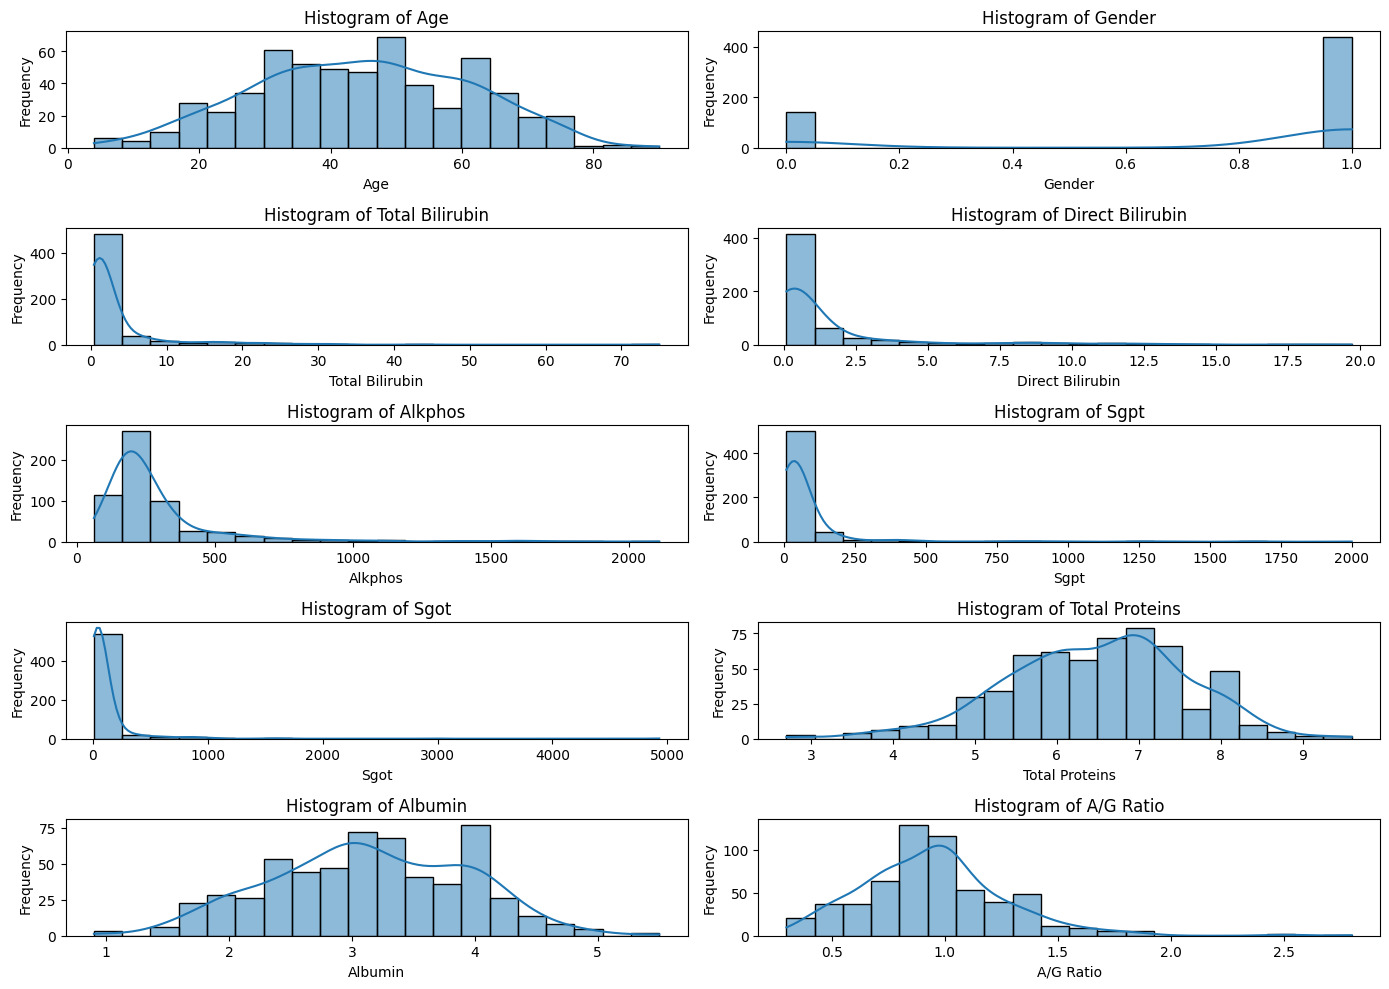

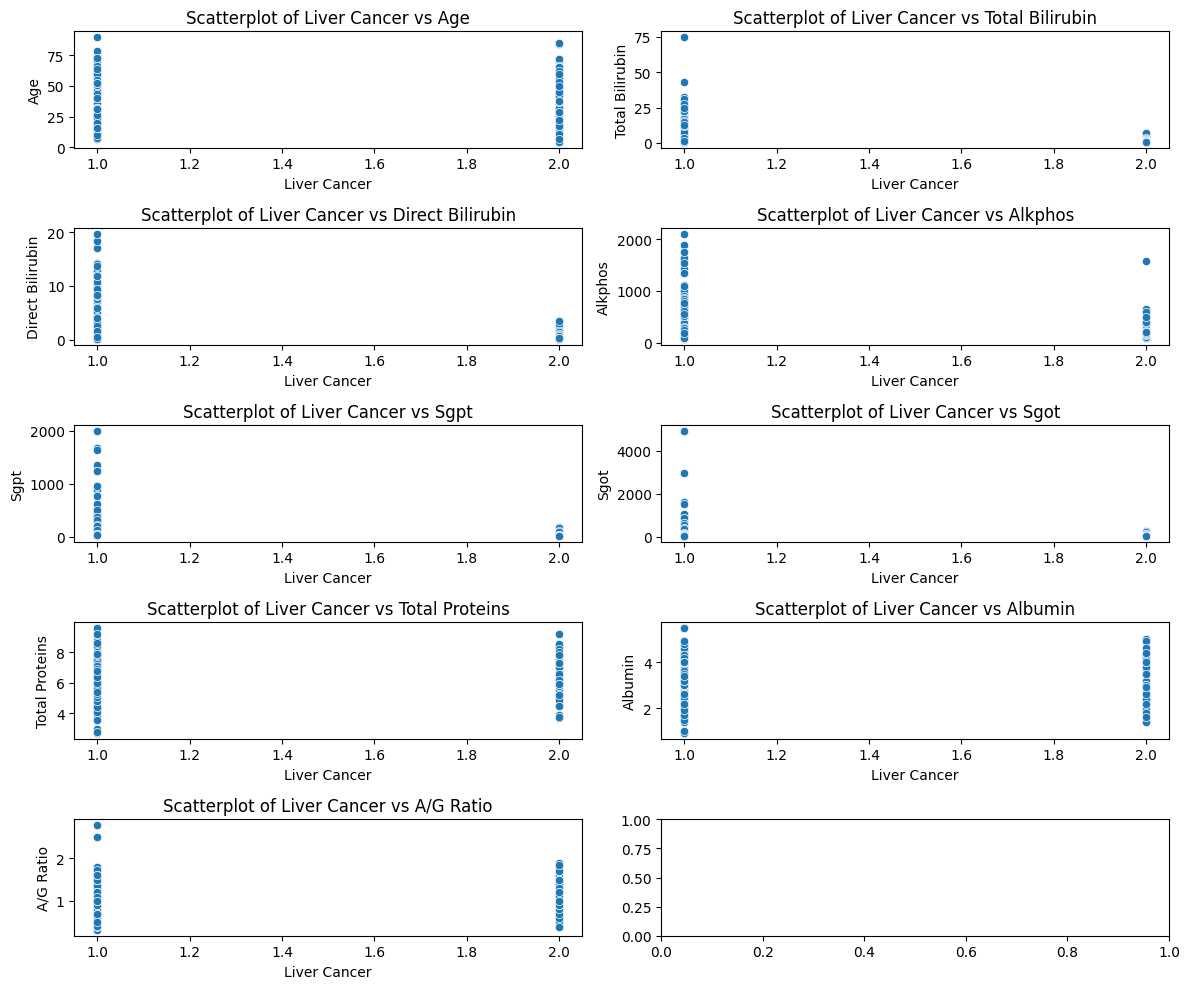

Confusion Matrix for Decision Tree:
[[71  2]
 [40  3]]

Confusion Matrix for Random Forest:
[[65  8]
 [37  6]]
Performance Metrics for Decision_Tree:
Accuracy: 0.6379310344827587
F1 Score: 0.7717391304347826


Performance Metrics for Random_Forest:
Accuracy: 0.6120689655172413
F1 Score: 0.7428571428571429


Performance Metrics for KMeans:
Silhouette Score: 0.5677910706751574
Davies-Bouldin Score: 1.0789731742465254


Performance Metrics for Hierarchical_Clustering:
Silhouette Score: 0.5772091178684584
Davies-Bouldin Score: 1.0464512407090025


Decision Tree Feature Importance:
           Feature  Importance
1          Alkphos    0.432488
2  Total Bilirubin    0.247253
0              Age    0.196699
3             Sgpt    0.123561

Random Forest Feature Importance:
           Feature  Importance
1          Alkphos    0.305118
3             Sgpt    0.249630
0              Age    0.243947
2  Total Bilirubin    0.201306


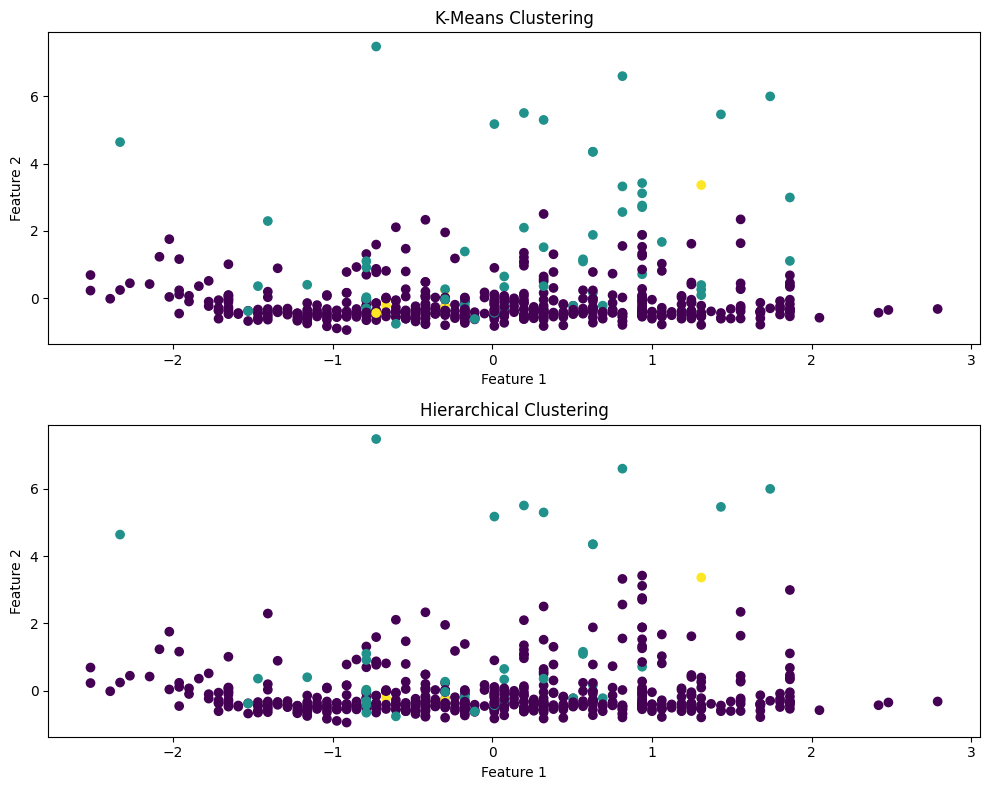

In [8]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
file_path = 'Indian Liver Patient Dataset (ILPD).csv'
columns = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos",
           "Sgpt", "Sgot", "Total Proteins", "Albumin", "A/G Ratio", "Liver Cancer"]
# Load excel file
data = pd.read_csv(file_path, names=columns)

# Assuming gender is listed as 'Male'/'Female'
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Drop rows with missing values
data = data.dropna()

# 1. Target attribute
target_attribute = 'Liver Cancer'

# 2. One instance of interest
instance_index = np.random.randint(len(data))
instance_of_interest = data.loc[instance_index]

# 3. Attribute of interest
attribute_of_interest = 'Alkphos'

# 4. Subset of rows of interest
gender_value = 1  # Male
subset = data[data['Gender'] == gender_value]

# 5. Cost matrix (benefits)
# Define the benefit matrix such that true positive has the highest benefit,
# followed by true negative, and false positives/negatives have lower benefits.
benefit_matrix = np.array([[10, 0], [0, 5]])

# 1. Histograms (or value frequencies)
# Show histograms for the target variable and selected other variables
selected_variables = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos",
                      "Sgpt", "Sgot", "Total Proteins", "Albumin", "A/G Ratio"]
num_cols = 2
num_rows = (len(selected_variables) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))

for idx, variable in enumerate(selected_variables):
    row = idx // num_cols
    col = idx % num_cols
    if variable != "Liver Cancer":
        sns.histplot(data[variable], bins=20, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Histogram of {variable}')
        axes[row, col].set_xlabel(variable)
        axes[row, col].set_ylabel('Frequency')
    else:
        value_counts = data[variable].value_counts()
        axes[row, col].bar(value_counts.index, value_counts.values)
        axes[row, col].set_title(f'Value frequencies for {variable}')
        axes[row, col].set_xlabel(variable)
        axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create subplots for scatterplots
num_subplots = len(columns) - 1  # Excluding the target variable
num_rows = (num_subplots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Show scatterplots showing the relationship between each predictor and the target variable
predictors = ["Age", "Total Bilirubin", "Direct Bilirubin", "Alkphos",
              "Sgpt", "Sgot", "Total Proteins", "Albumin", "A/G Ratio"]

for i, predictor in enumerate(predictors):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(data=data, x="Liver Cancer",
                    y=predictor, ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot of Liver Cancer vs {predictor}')
    axes[row, col].set_xlabel('Liver Cancer')
    axes[row, col].set_ylabel(predictor)

# Adjust layout
plt.tight_layout()
plt.show()

# Define selected features
selected_features = ['Age', 'Alkphos', 'Total Bilirubin', 'Sgpt']

# Define predictors and target variable for supervised models
X = data[selected_features]
y = data['Liver Cancer']


# Split the data into a training set and a test set (80% train, 20% test) for supervised models
# 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature Rescaling or Normalization
scaler = StandardScaler()
scaled_subset_data = scaler.fit_transform(X)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluation
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Dictionary to store performance metrics for each model
performance_metrics = {}

# Decision Tree classifier evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
performance_metrics['Decision_Tree'] = {
    'Accuracy': dt_accuracy, 'F1 Score': dt_f1_score}

# Random Forest classifier evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
performance_metrics['Random_Forest'] = {
    'Accuracy': rf_accuracy, 'F1 Score': rf_f1_score}

# Print confusion matrix for Decision Tree classifier
print("Confusion Matrix for Decision Tree:")
print(dt_conf_matrix)

# Print confusion matrix for Random Forest classifier
print("\nConfusion Matrix for Random Forest:")
print(rf_conf_matrix)

# K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(scaled_subset_data)
kmeans_silhouette = silhouette_score(scaled_subset_data, kmeans.labels_)
kmeans_davies_bouldin = davies_bouldin_score(
    scaled_subset_data, kmeans.labels_)
performance_metrics['KMeans'] = {
    'Silhouette Score': kmeans_silhouette, 'Davies-Bouldin Score': kmeans_davies_bouldin}

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(scaled_subset_data)
agg_silhouette = silhouette_score(scaled_subset_data, agg_clustering.labels_)
agg_davies_bouldin = davies_bouldin_score(
    scaled_subset_data, agg_clustering.labels_)
performance_metrics['Hierarchical_Clustering'] = {
    'Silhouette Score': agg_silhouette, 'Davies-Bouldin Score': agg_davies_bouldin}

# Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(scaled_subset_data, kmeans.labels_)
kmeans_davies_bouldin = davies_bouldin_score(
    scaled_subset_data, kmeans.labels_)

# Evaluate Hierarchical clustering
agg_silhouette = silhouette_score(scaled_subset_data, agg_clustering.labels_)
agg_davies_bouldin = davies_bouldin_score(
    scaled_subset_data, agg_clustering.labels_)

# Plotting
plt.figure(figsize=(10, 8))

# Display performance metrics for each model
for model, metrics in performance_metrics.items():
    print(f"Performance Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Decision Tree Feature Importance
dt_feature_importance = dt_classifier.feature_importances_
dt_feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': dt_feature_importance})
dt_feature_importance_df = dt_feature_importance_df.sort_values(
    by='Importance', ascending=False)

print("Decision Tree Feature Importance:")
print(dt_feature_importance_df)

# Random Forest Feature Importance
rf_feature_importance = rf_classifier.feature_importances_
rf_feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(
    by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_feature_importance_df)

# Plot clusters for K-Means
plt.subplot(2, 1, 1)
plt.scatter(scaled_subset_data[:, 0], scaled_subset_data[:, 1],
            c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot clusters for Hierarchical Clustering
plt.subplot(2, 1, 2)
plt.scatter(scaled_subset_data[:, 0], scaled_subset_data[:, 1],
            c=agg_clustering.labels_, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Interpretation of the results
### Histograms
- **Age:** 
  The histogram illustrates that the majority of patients in the dataset are between approximately 30 to 60 years old. There's a peak around the middle ages, indicating that the dataset is skewed towards middle-aged individuals. 
- **Gender:** 
  The histogram reveals the distribution of genders within the dataset. There's a disparity between male and female frequencies, it could imply gender bias in the dataset or a true prevalence of liver disease among one gender over the other. 
- **Total Bilirubin, Direct Bilirubin, Alkphos, Sgpt, Sgot:** 
  These histograms display the distribution of various biochemical parameters relevant to liver function. For instance, the histogram for Total Bilirubin might show a skewed distribution with a long tail to the right, indicating that some patients have exceptionally high bilirubin levels, which could be indicative of liver dysfunction or disease severity. 
  The histograms for Total Proteins, Albumin, and A/G Ratio showed more balanced distributions across different categories, indicating that these features did not exhibit significant differences between patients with liver disease and those without it.
### Scatterplots
- **Liver Cancer vs. Total Proteins:** 
  No clear difference in total protein levels between those with and without liver cancer.
- **Liver Cancer vs. Albumin:** 
  Similarly, no obvious distinction in albumin levels.
- **Liver Cancer vs. A/G Ratio:** 
  Again, data points cluster towards the lower end and don't show a marked difference between those with and without liver cancer.
- **Liver Cancer vs. Age:** 
  Age appears widely distributed across individuals with and without liver cancer, suggesting no strong correlation.
- **Liver Cancer vs. Total & Direct Bilirubin:** 
  Bilirubin levels might be slightly higher in individuals with liver cancer, but the majority of data points indicate lower levels for both groups.
- **Liver Cancer vs. Alkphos:** 
  Alkaline Phosphotase data is mostly clustered at the lower end, though there are outliers with higher levels, particularly in those with liver cancer.
- **Liver Cancer vs. Sgpt & Sgot:** 
  Most participants show lower Sgpt and Sgot values, with outliers suggesting elevated levels in some individuals with liver cancer.
### Key Takeaways
- **Little Apparent Correlation:** 
  The scatterplots, on their own, don't present a strong visual correlation between the plotted biochemical markers and liver cancer status.
- **Data Concentration:** 
  Several graphs show data clustered towards lower values, which could be due to normal ranges for these markers or limitations in the testing methods.
- **Potential Outliers:** 
  Some scatterplots (Alkphos, Sgpt, Sgot) show more outliers with elevated values among those with liver cancer. This could suggest a link.
- **Need for More Analysis:** 
  To truly understand the potential relationships, statistical analysis (e.g., correlation calculations, regression analysis) is crucial.
- **Importance of Context:** 
  Factors like sample size, demographics, and how the data was collected will greatly influence the conclusions drawn.


Cluster 1:
Centroid: [-0.01332553 -0.18744967 -0.25719155 -0.14641724]
Number of instances: 512

Cluster 2:
Centroid: [0.1963582  1.6439389  2.17615519 0.18143603]
Number of instances: 57

Cluster 3:
Centroid: [-0.43697454  0.22697154  0.76412276  6.46237719]
Number of instances: 10

The chosen instance is assigned to Cluster 1


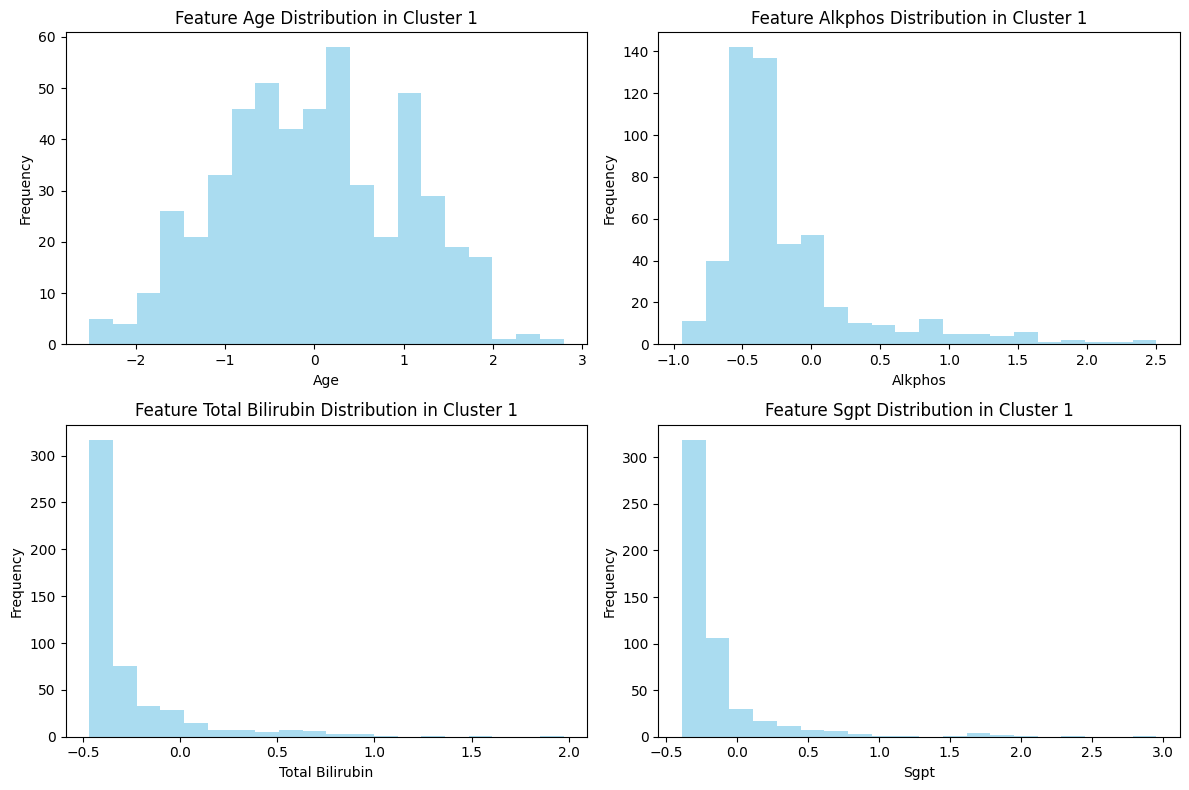

In [9]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming scaled_subset_data and selected_features are defined
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly setting n_init to 10
kmeans.fit(scaled_subset_data)

# Interpret the final clusters based on centroids and number of instances
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i+1}:")
    print(f"Centroid: {centroid}")
    print(f"Number of instances: {np.sum(kmeans.labels_ == i)}")
    print()

# Chosen instance for classification
chosen_instance_index = np.random.randint(len(scaled_subset_data))
chosen_instance_features = scaled_subset_data[chosen_instance_index].reshape(1, -1)

# Classify the chosen instance into a cluster
chosen_instance_cluster = kmeans.predict(chosen_instance_features)[0]

# Inspect the assigned cluster
print(f"The chosen instance is assigned to Cluster {chosen_instance_cluster + 1}")

# Inspect the assigned cluster by visualizing its characteristics
cluster_instances = scaled_subset_data[kmeans.labels_ == chosen_instance_cluster]

# Plot histograms for each feature within the assigned cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    ax.hist(cluster_instances[:, i], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'Feature {selected_features[i]} Distribution in Cluster {chosen_instance_cluster + 1}')
    ax.set_xlabel(selected_features[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Clustering Results Summarytances: 10

- **Feature Distribution in Cluster 1**:
  - **Age**:
    - Appears normally distributed with a slight right skew.
    - Most individuals are centered around the mean age.
  - **Alkaline Phosphatase (Alkphos)**:
    - Highly skewed to the right, with most instances near the lower end.
  - **Total Bilirubin**:
    - Highly skewed to the right; majority of instances have low biliyruvc Transaminase (Sgpt)**:
    - Right skewed distribution; majority of instances have low Sgpt levels.

**Conclusion**: Cluster 1 is the largest and contains instances with features skewed towards lower values, except for age which is more normally distributed. Clusters 2 and 3 are smaller and likely represent more extreme or outlier cases with higher feature values.


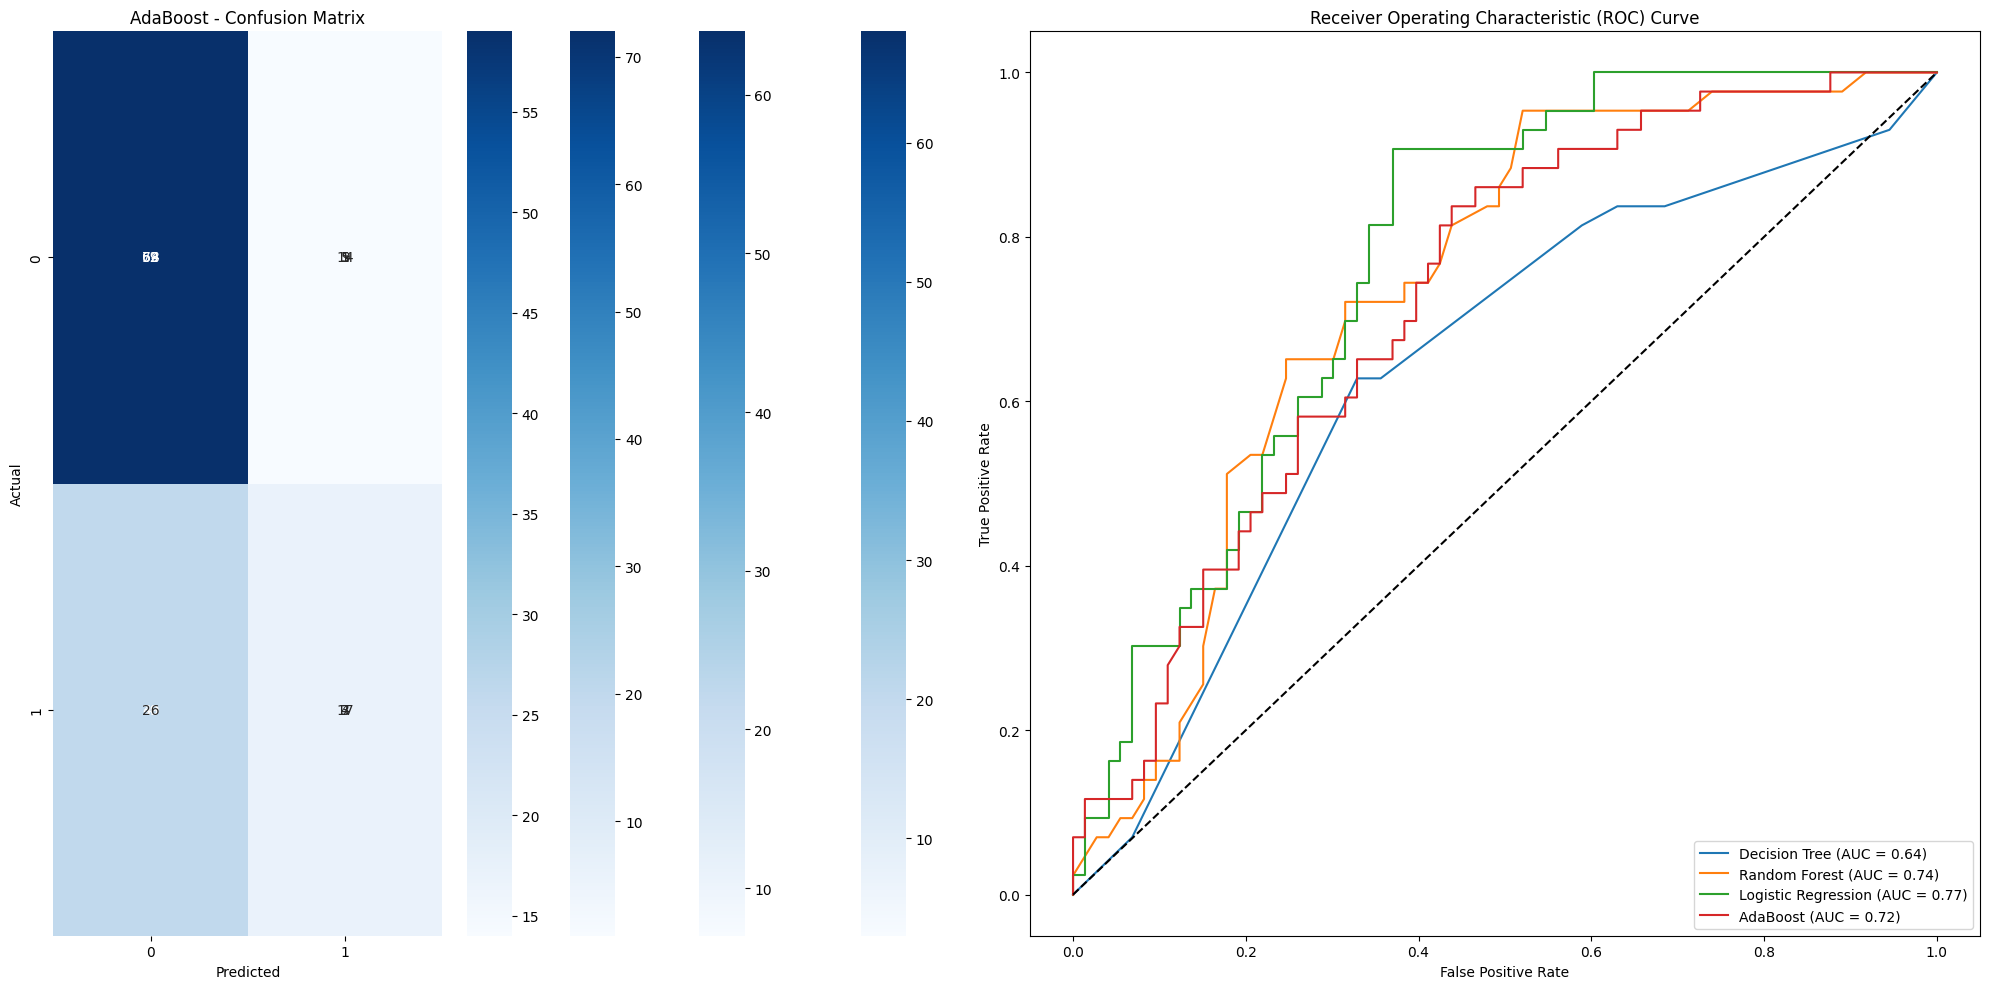

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


# Convert 'Liver Cancer' labels from {1, 2} to {0, 1}
y = data['Liver Cancer'].apply(lambda x: 0 if x == 1 else 1)

# Additional necessary imports
from sklearn.metrics import roc_auc_score  # Ensure this is imported if using roc_auc

# Prepare the data
X = data.drop('Liver Cancer', axis=1)
y = data['Liver Cancer'].apply(lambda x: 0 if x == 1 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=123),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=123),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=123),
    'AdaBoost': AdaBoostClassifier(random_state=123)
}

# Initialize plot for ROC Curves
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Train and evaluate models
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(roc_curve(y_test, y_prob)[0], roc_curve(y_test, y_prob)[1])

    # Confusion Matrix Visualization
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', ax=axes[0])
    axes[0].set_title(f'{name} - Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[1].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC Curve Plot
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## Evaluation - AdaBoost & Logistic Regression

### AdaBoost Confusion Matrix
- **Correct Predictions**
  - True Positives (TP): 187
  - True Negatives (TN): 59
- **Incorrect Predictions**
  - False Positives (FP): 26
  - False Negatives (FN): 1
- The AdaBoost model shows strong performance, especially in identifying positive instances.

### ROC Curve Comparison
- **Model Performance (AUC Score)**
  - Decision Tree: 0.64
  - Random Forest: 0.74
  - Logistic Regression: 0.77
  - AdaBoost: 0.72
- Logistic Regression has the highest AUC, indicating superior performance compared to other models.
- AdaBoost shows reasonable performance but is outclassed by Logistic Regression.

**Conclusion:** The AdaBoost classifier is effective, with a particular strength in detecting positive cases, but the Logistic Regression model shows the best overall performance in this comparison.


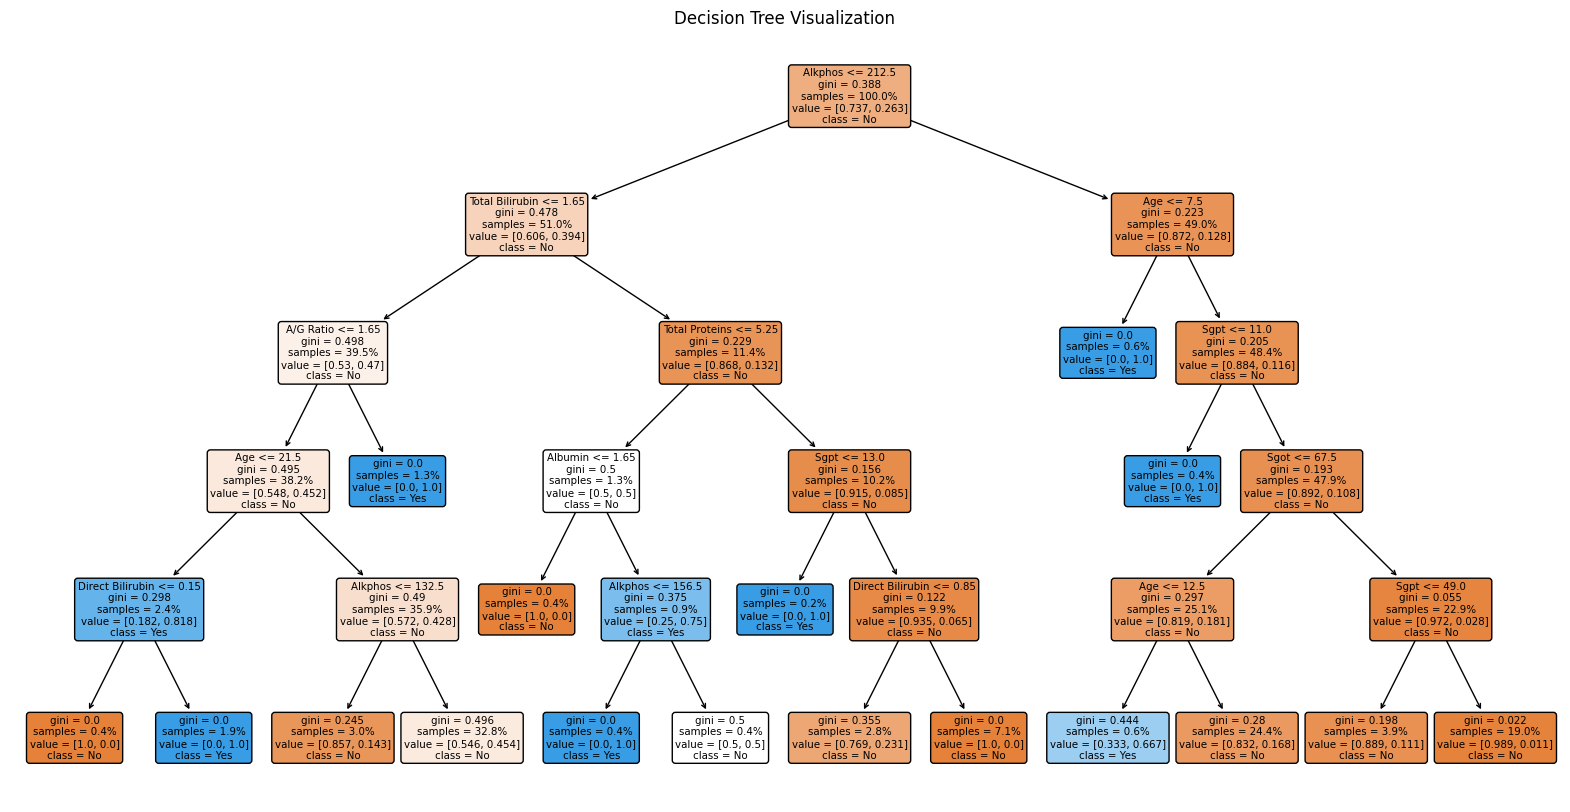

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Ensure the feature names are in list format
feature_names = X_train.columns.tolist()

# Train a Decision Tree for visualization
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=123)
decision_tree_model.fit(X_train, y_train)  # Use the already scaled X_train if scaling was applied previously

# Visualization
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=feature_names, class_names=['No', 'Yes'], rounded=True, proportion=True)
plt.title("Decision Tree Visualization")
plt.show()

## Decision Tree Visualization Summary

- **Root Node Feature**: 'Total Bilirubin' is the first decision criterion, suggesting it's an important feature.
- **Predictions**: Each node leads to a 'Yes' or 'No' outcome, based on majority class in the node.
- **Gini Impurity**: Nodes show Gini scores; a score of 0 indicates a pure node.
- **Sample Distribution**: The number of samples at each node is listed, showing how data splits.
- **Splitting Thresholds**: Nodes are split based on feature thresholds, like 'Total Bilirubin < 1.65'.
- **Leaf Nodes**: End nodes give the final prediction, with no further somportance.

